Your task is to perform statistical analysis using this dataset.
https://www.kaggle.com/datasets/abrambeyer/openintro-possum
You are to document in detail, the interpretation of your results from all the measures of centre, all measures of spread,  and outlier detection mechanisms.

In [3]:
# importing  neccesary libraries

%pip install scipy  
%pip install missingno 

import pandas as pd  #pandas for data manipulation
import numpy as np  #numpy for numerical operations
import matplotlib.pyplot as plt #matplotlib for data visualization 
import seaborn as sns   #seaborn for statistical data visualization
import os  #os for operating system interactions
import scipy.stats as stats  #scipy for scientific computing
import statistics  #statistics for statistical functions


print("imported successes ")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
imported successes 
Note: you may need to restart the kernel to use updated packages.
imported successes 


In [4]:
#Load in the posson dataset from the data folder
possum_data = pd.read_csv('possum.csv')    # Load the dataset
print("Data Loaded Successfully")

Data Loaded Successfully


In [135]:
#viewing a few rows of the dataset
possum_data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [136]:
#viewing the last few rows of the dataset
possum_data.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [137]:
# Viewing  the number of rows and columns in the dataset
possum_data.shape

(104, 14)

In [5]:
possum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [138]:
# Viewing the data types of each column
possum_data.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [139]:
# Viewing  a summary of the dataset
possum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [140]:
# checking for missing values
possum_data[possum_data.isna().any(axis=1)] # Check for rows with any missing values
print(possum_data.isna().sum())  # Check for missing values in each column


case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


age         2
footlgth    1
site        0
Pop         0
sex         0
case        0
hdlngth     0
skullw      0
totlngth    0
taill       0
dtype: int64


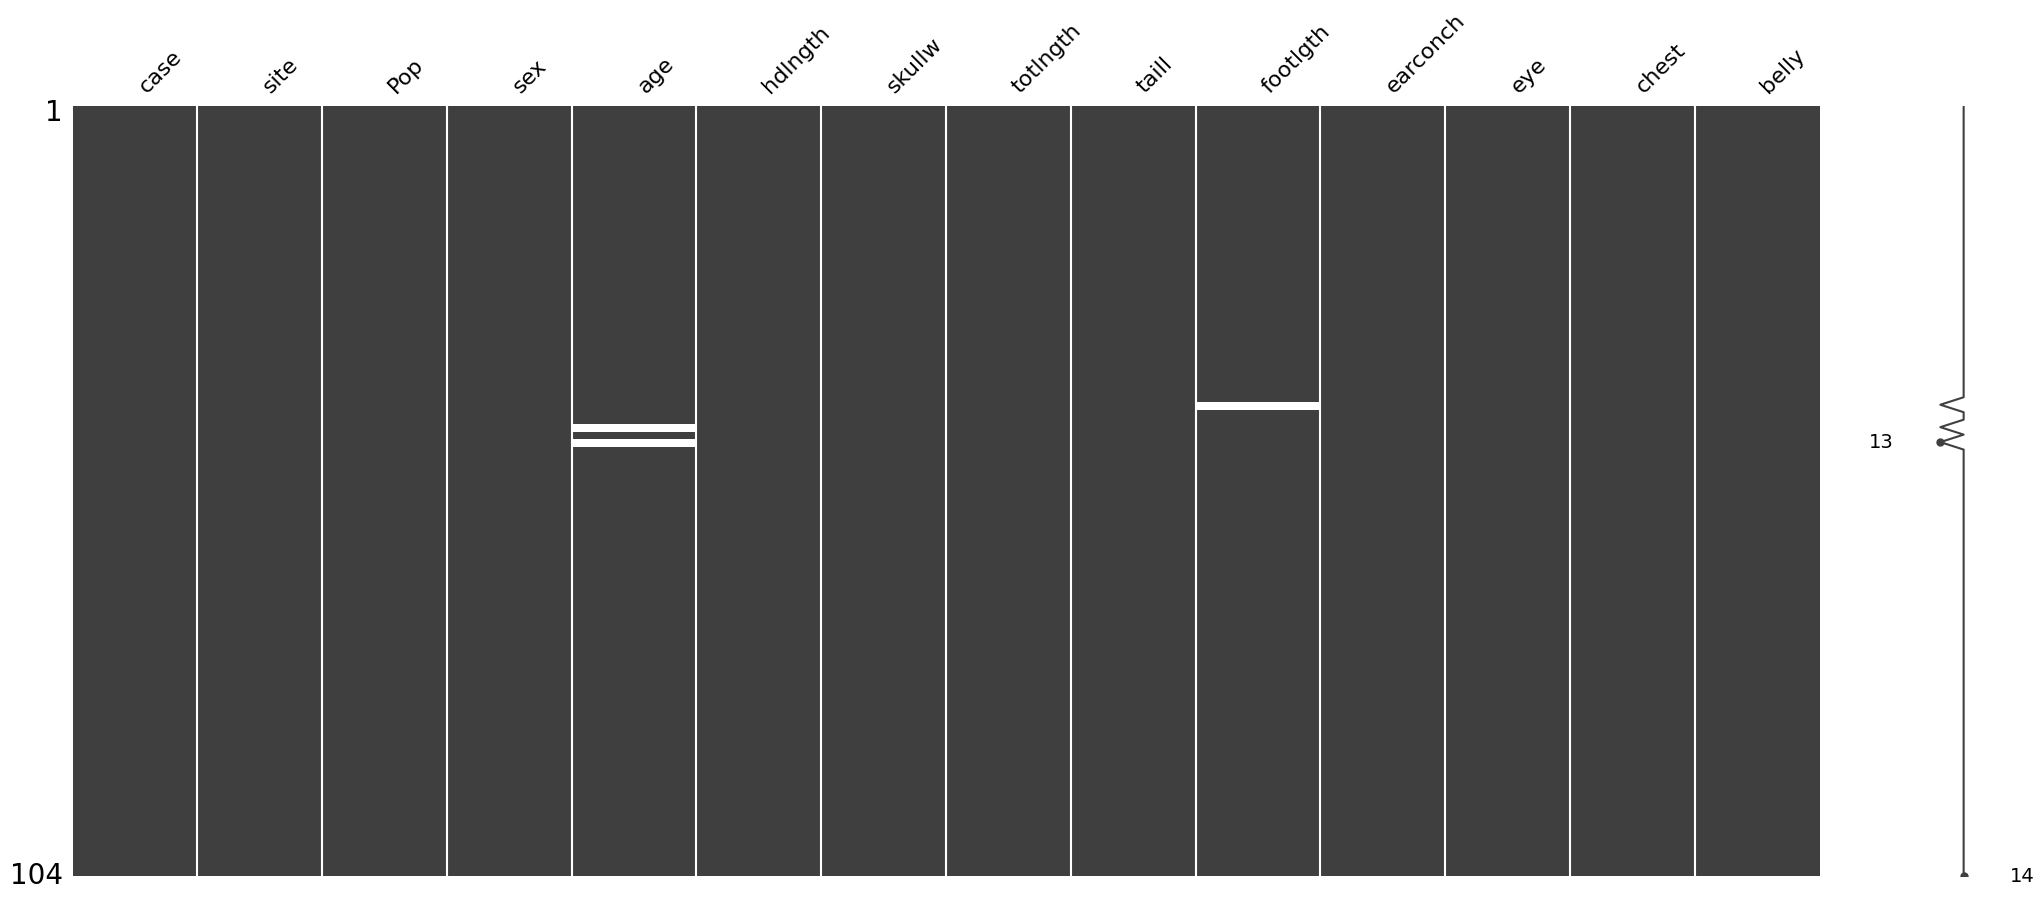

In [141]:
# Visualizing missing values using missingno
import missingno as msno   # pip install missingno
msno.matrix(possum_data)            # visual heat-map
print(possum_data.isna().sum().sort_values(ascending=False).head(10))  # top-10 miss counts

## 2 numerical columns have missing values :
* 2 rows in age
* 1 value in footlength

## How do i handle this? I have 3 options
* drop the rows - lose information, but no bias is introduced
* replace the value with zero -  
* replace the vale with the median - kepp rows,  but don’t fake the values


In [142]:
# replacing the missing values with the median of the column
possum_data.fillna(possum_data.median(numeric_only=True), inplace=True)
#possum_data['age'].fillna(possum_data['age'].median(), inplace=True)
#possum_data['footlength'].fillna(possum_data['footlength'].median(), inplace=True)
print("Missing values handled")
possum_data.shape[0]  # Check the number of rows after handling missing values

Missing values handled


104

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
dtype: int64


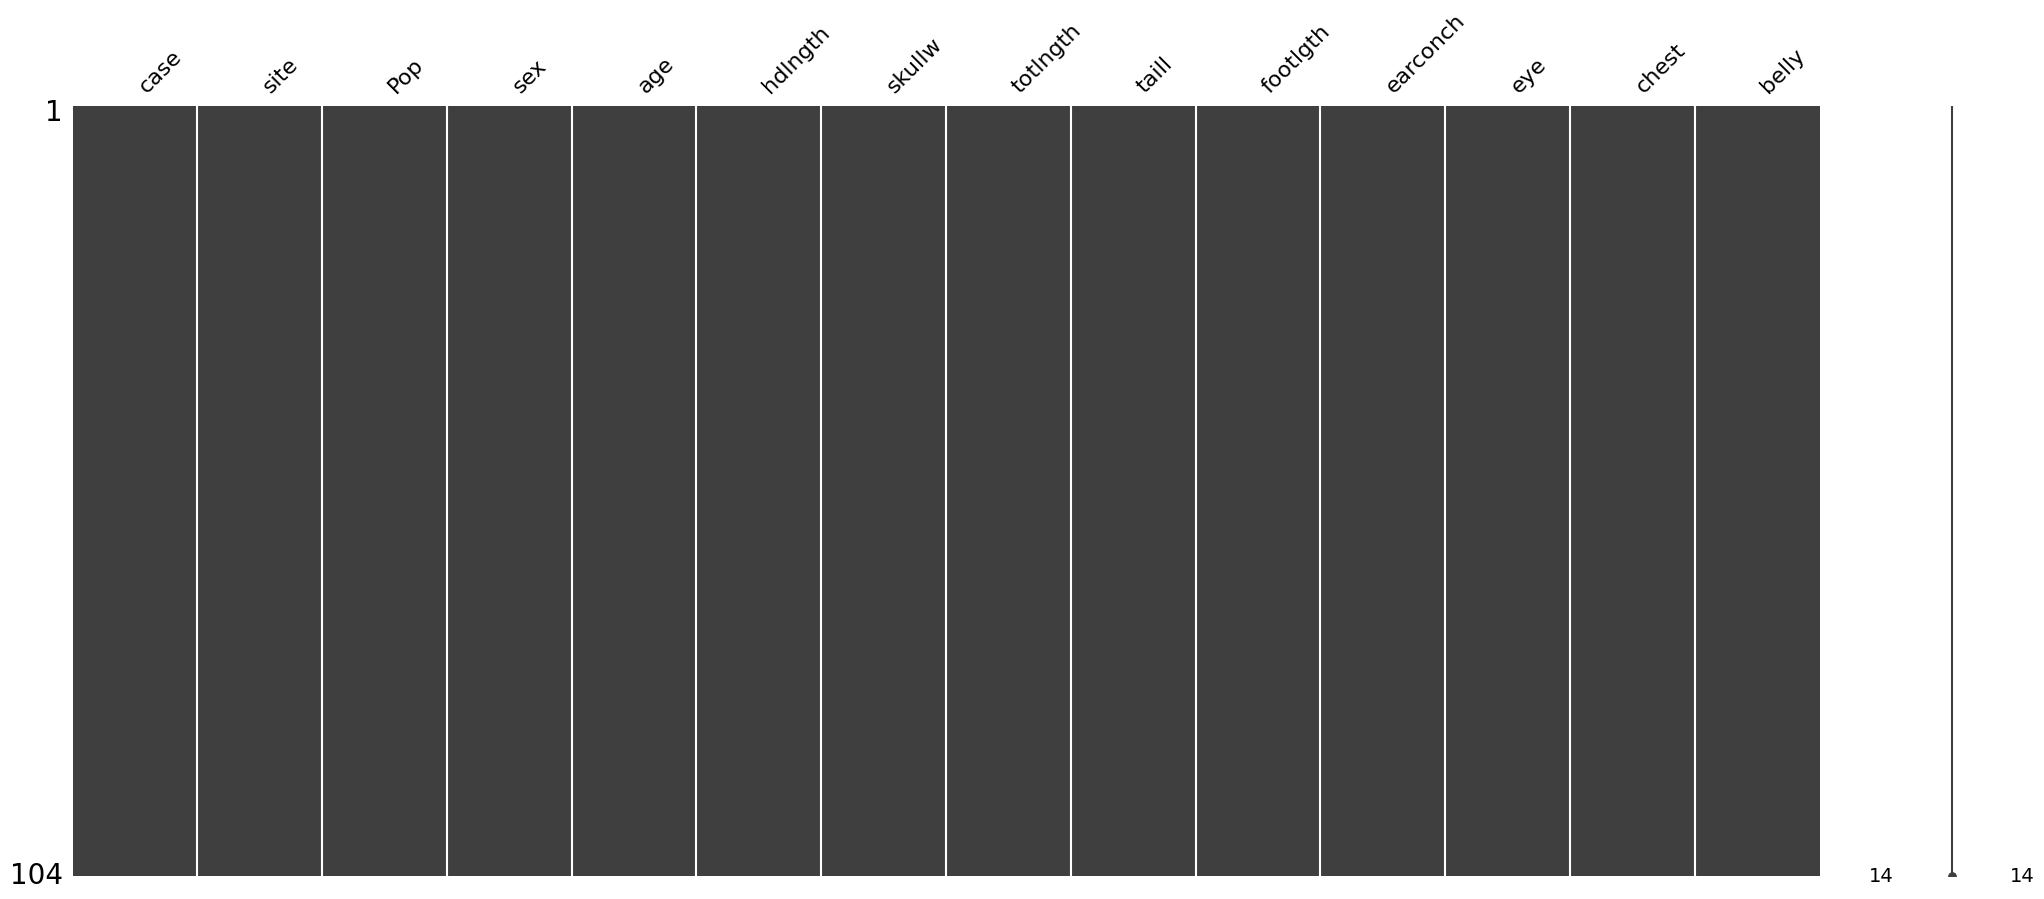

In [143]:
# Visualizing missing values again using missingno to confirm all missing values are handled
msno.matrix(possum_data)            # visual heat-map
print(possum_data.isna().sum().sort_values(ascending=False).head(10))  # top-10 miss counts

In [144]:
# removing missing values
   # possum_data = possum_data.dropna()  # Drop rows with any missing values
    #print("Missing values handled")
 #   possum_data.reset_index(drop=True, inplace=True) #Reset index after dropping rows
  #  print("Index reset successfully")
   # possum_data.shape[0]  # Check the number of rows after dropping missing values

In [145]:
# taking a snapshop of the cleaned data
possum_data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [146]:
# taking a snapshop of the cleaned data

possum_data.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [147]:
# checking for duplicates
duplicates = possum_data.duplicated()   # Check for duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")  # Print the number of duplicate rows

Number of duplicate rows: 0


# Performing statistical analysis

In [148]:
# Getting the descriptive statistics for categorical columns
categorical_cols = possum_data.select_dtypes(include=['object', 'category']).columns
print(possum_data[categorical_cols].describe(include='all').round(2))




          Pop  sex
count     104  104
unique      2    2
top     other    m
freq       58   61


In [149]:
# Custom summary for categorical columns (fixed version)

# Select only the categorical columns from possum_data

categorical_cols = possum_data.select_dtypes(include=['object', 'category'])

def categorical_summar(categorical_cols):
    summaries = {}
    for col in categorical_cols.columns:
        counts = categorical_cols[col].value_counts(dropna=False)
        percentages = categorical_cols[col].value_counts(normalize=True, dropna=False) * 100
        summary = pd.DataFrame({"Count": counts, "Percentage": percentages.round(2)})
        summaries[col] = summary
    return summaries

cat_stats = categorical_summar(categorical_cols)
cat_stats
print(cat_stats)
print(f'')

{'Pop':        Count  Percentage
Pop                     
other     58       55.77
Vic       46       44.23, 'sex':      Count  Percentage
sex                   
m       61       58.65
f       43       41.35}




### Insight into categorical variable 
There are two categorical data: sex and pop

there are more male possom sampled at  58.65% than sampled female possom at 41.35%
In terms of population, Others are more represented at 55.77% than VIc at 44.33%



In [150]:
# getting the descriptive statistics for numerical columns
numerical_cols = possum_data.select_dtypes(include=['number']).columns
print(possum_data[numerical_cols].describe().round(2))

         case    site     age  hdlngth  skullw  totlngth   taill  footlgth  \
count  104.00  104.00  104.00   104.00  104.00    104.00  104.00    104.00   
mean    52.50    3.62    3.82    92.60   56.88     87.09   37.01     68.45   
std     30.17    2.35    1.89     3.57    3.11      4.31    1.96      4.37   
min      1.00    1.00    1.00    82.50   50.00     75.00   32.00     60.30   
25%     26.75    1.00    2.75    90.68   54.98     84.00   35.88     64.65   
50%     52.50    3.00    3.00    92.80   56.35     88.00   37.00     68.00   
75%     78.25    6.00    5.00    94.72   58.10     90.00   38.00     72.50   
max    104.00    7.00    9.00   103.10   68.60     96.50   43.00     77.90   

       earconch     eye   chest   belly  
count    104.00  104.00  104.00  104.00  
mean      48.13   15.05   27.00   32.59  
std        4.11    1.05    2.05    2.76  
min       40.30   12.80   22.00   25.00  
25%       44.80   14.40   25.50   31.00  
50%       46.80   14.90   27.00   32.50  
75%

### Insight from the descriptive Statistics
* Age is skewed toward younger individuals (mean and median both under 4)
* Some traits like head length and tail length have low variability (low standard deviation compared to the mean)
* Some other traits like belly width, chest width, have higher variability


In [161]:
# Outliers detection using Interquartile Range (IQR)
for col in numerical_cols:
    Q1 = possum_data[col].quantile(0.25)
    Q3 = possum_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = possum_data[(possum_data[col] < lower_bound) | (possum_data[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} outliers detected")
    print(outliers.values)

case: 0 outliers detected
[]
site: 0 outliers detected
[]
age: 2 outliers detected
[9. 9.]
hdlngth: 3 outliers detected
[103.1 102.5  82.5]
skullw: 8 outliers detected
[67.7 63.2 63.  63.2 64.2 62.8 50.  68.6]
totlngth: 0 outliers detected
[]
taill: 4 outliers detected
[32.  32.  43.  41.5]
footlgth: 0 outliers detected
[]
earconch: 0 outliers detected
[]
eye: 1 outliers detected
[17.8]
chest: 1 outliers detected
[32.]
belly: 3 outliers detected
[40. 25. 39.]


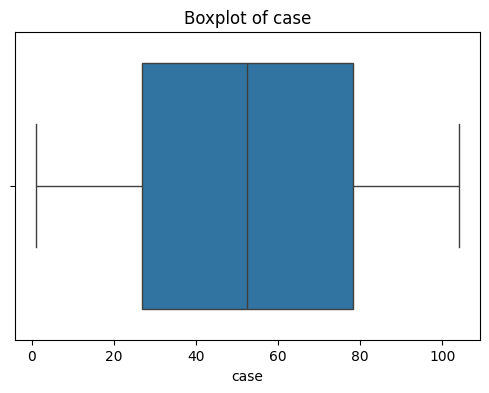

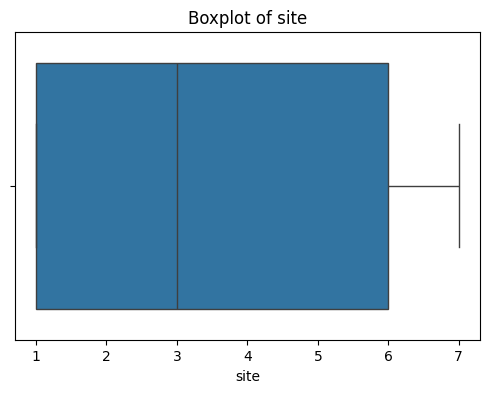

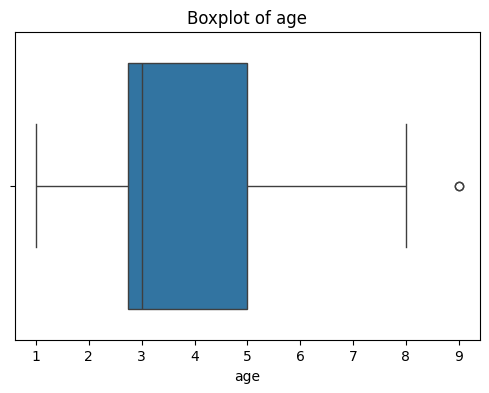

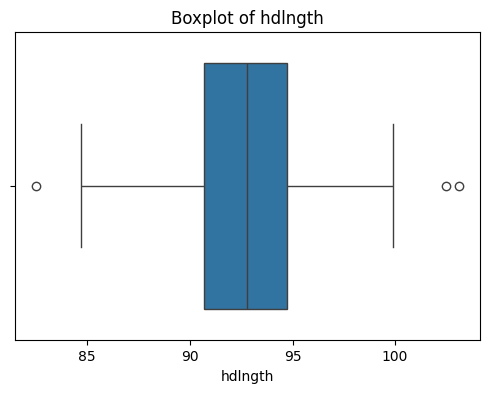

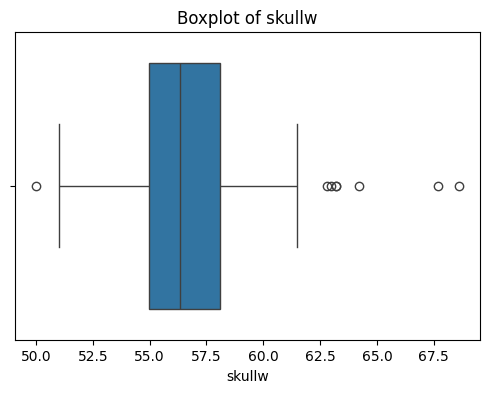

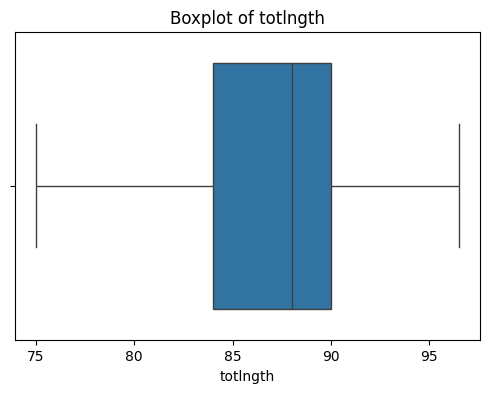

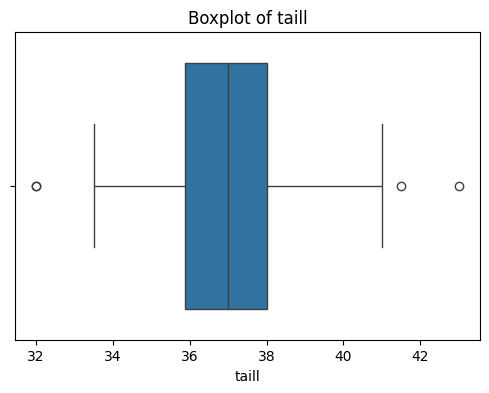

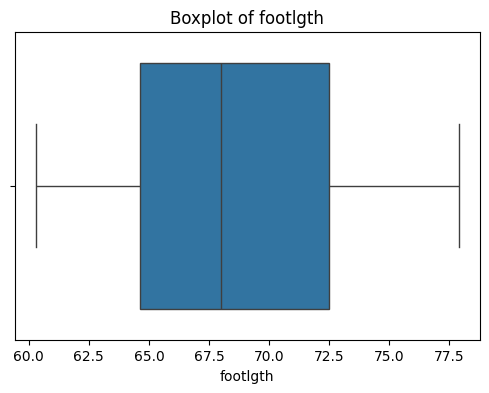

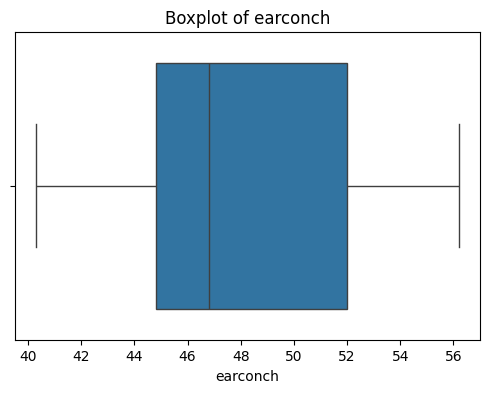

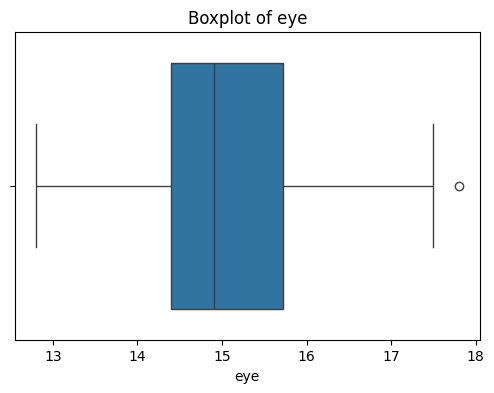

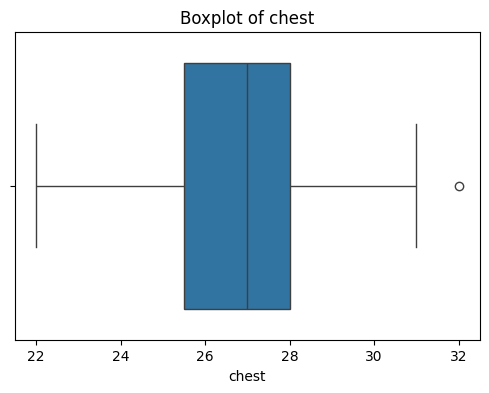

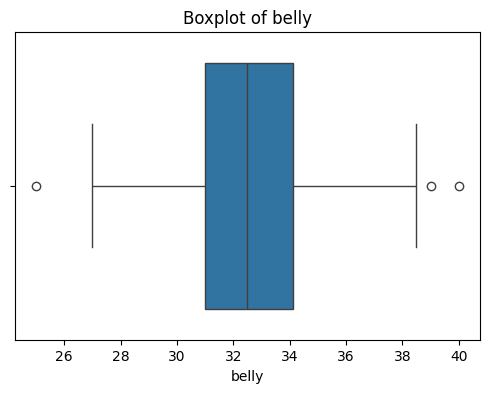

In [159]:
# Outlier detection using boxplots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=possum_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()